In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
from citipy import citipy
## Import the requests library.
import requests
## Import the API key.
from config import weather_api_key
## Import time library & datetime module 
import time
from datetime import datetime

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list to hold cities.
cities = []
# Identify nearest city for each lat and lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, add it to cities list
    if city not in cities:
        cities.append(city)

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# OUTDATED:
# Loop through all of the cities in our list
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL for each city.
    city_url = url + "&q" + cities[i]

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If error happens, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hofn
Processing Record 2 of Set 1 | raudeberg
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | udachnyy
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | tsilna
Processing Record 17 of Set 1 | chumikan
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | mbini
Processing Record 22 of Set 1 | muros
Processing Record 23 o

Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | sarahan
Processing Record 46 of Set 4 | dayong
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | sioux lookout
Processing Record 50 of Set 4 | phangnga
Processing Record 1 of Set 5 | ferme-neuve
Processing Record 2 of Set 5 | cururupu
Processing Record 3 of Set 5 | sokoni
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | abbeville
Processing Record 7 of Set 5 | krylovskaya
Processing Record 8 of Set 5 | haibowan
City not found. Skipping...
Processing Record 9 of Set 5 | hammerfest
Processing Record 10 of Set 5 | mandalgovi
Processing Record 11 of Set 5 | srivardhan
Processing Record 12 of Set 5 | zhangye
Processing Record 13 of Set 5 | cananeia
Processing Record 14 of Set 5 | flinders
Processing Record 15 of Set 5 | ossor

Processing Record 32 of Set 8 | farmington
Processing Record 33 of Set 8 | autazes
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | caravelas
Processing Record 36 of Set 8 | rosarito
Processing Record 37 of Set 8 | camopi
Processing Record 38 of Set 8 | maarianhamina
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | puerto escondido
Processing Record 41 of Set 8 | killybegs
Processing Record 42 of Set 8 | limoges
Processing Record 43 of Set 8 | morant bay
Processing Record 44 of Set 8 | shymkent
Processing Record 45 of Set 8 | turinsk
Processing Record 46 of Set 8 | panaba
Processing Record 47 of Set 8 | pemangkat
Processing Record 48 of Set 8 | rungata
City not found. Skipping...
Processing Record 49 of Set 8 | mazamet
Processing Record 50 of Set 8 | amderma
City not found. Skipping...
Processing Record 1 of Set 9 | padang
Processing Record 2 of Set 9 | bilma
Processing Record 3 of Set 9 | yellowknife
Processing Record 4 of Set 9 | fortuna

Processing Record 19 of Set 12 | isagarh
Processing Record 20 of Set 12 | juybar
Processing Record 21 of Set 12 | daniel flores
Processing Record 22 of Set 12 | puerto del rosario
Processing Record 23 of Set 12 | ojinaga
Processing Record 24 of Set 12 | kushmurun
Processing Record 25 of Set 12 | diamantino
Processing Record 26 of Set 12 | atagay
Processing Record 27 of Set 12 | banjar
Processing Record 28 of Set 12 | puerto cabezas
Processing Record 29 of Set 12 | lima
Processing Record 30 of Set 12 | oktyabrskoye
Processing Record 31 of Set 12 | mujiayingzi
Processing Record 32 of Set 12 | kodinsk
Processing Record 33 of Set 12 | gramalote
Processing Record 34 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 35 of Set 12 | tari
Processing Record 36 of Set 12 | iroquois falls
Processing Record 37 of Set 12 | abohar
Processing Record 38 of Set 12 | katsina
Processing Record 39 of Set 12 | kitimat
Processing Record 40 of Set 12 | aktash
Processing Record 41 of Set 12 |

In [10]:
len(city_data)

558

In [14]:
# Convert city_data array of dictionaries into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,39.22,65,90,8.05,IS,2021-12-09 16:00:47
1,Raudeberg,61.9875,5.1352,39.87,60,96,7.00,NO,2021-12-09 16:00:48
2,Upernavik,72.7868,-56.1549,8.26,96,93,10.89,GL,2021-12-09 15:59:09
3,Tuktoyaktuk,69.4541,-133.0374,-5.80,84,1,5.75,CA,2021-12-09 15:59:02
4,Udachnyy,66.4167,112.4000,-7.20,89,100,18.77,RU,2021-12-09 16:00:48
5,Vaini,-21.2000,-175.2000,71.76,94,20,5.75,TO,2021-12-09 15:58:53
6,Esperance,-33.8667,121.9000,64.53,67,97,21.05,AU,2021-12-09 16:00:49
7,Ushuaia,-54.8000,-68.3000,58.62,54,40,25.32,AR,2021-12-09 15:54:22
8,Hobart,-42.8794,147.3294,54.27,83,90,1.01,AU,2021-12-09 15:58:07
9,Bengkulu,-3.8004,102.2655,76.75,89,100,4.34,ID,2021-12-09 15:59:41


In [15]:
# Reorder city_data_df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-12-09 16:00:47,64.2539,-15.2082,39.22,65,90,8.05
1,Raudeberg,NO,2021-12-09 16:00:48,61.9875,5.1352,39.87,60,96,7.00
2,Upernavik,GL,2021-12-09 15:59:09,72.7868,-56.1549,8.26,96,93,10.89
3,Tuktoyaktuk,CA,2021-12-09 15:59:02,69.4541,-133.0374,-5.80,84,1,5.75
4,Udachnyy,RU,2021-12-09 16:00:48,66.4167,112.4000,-7.20,89,100,18.77
5,Vaini,TO,2021-12-09 15:58:53,-21.2000,-175.2000,71.76,94,20,5.75
6,Esperance,AU,2021-12-09 16:00:49,-33.8667,121.9000,64.53,67,97,21.05
7,Ushuaia,AR,2021-12-09 15:54:22,-54.8000,-68.3000,58.62,54,40,25.32
8,Hobart,AU,2021-12-09 15:58:07,-42.8794,147.3294,54.27,83,90,1.01
9,Bengkulu,ID,2021-12-09 15:59:41,-3.8004,102.2655,76.75,89,100,4.34


In [16]:
# Create CSV output file
output_data_file = "weather_data/cities.csv"
# Export the City_Data into new CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Extract relevant fields from the data frame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Plotting Weather Data

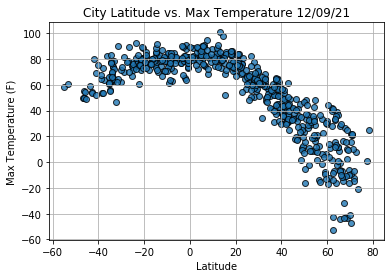

In [18]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

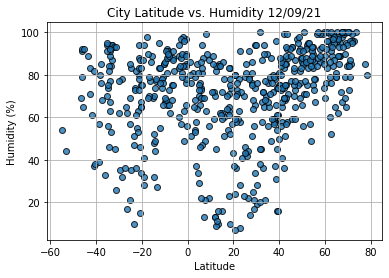

In [19]:
#Build scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

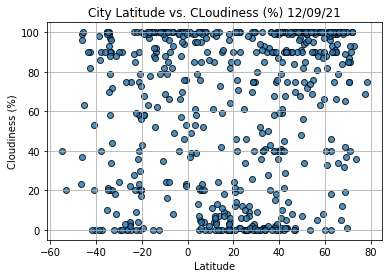

In [20]:
#Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

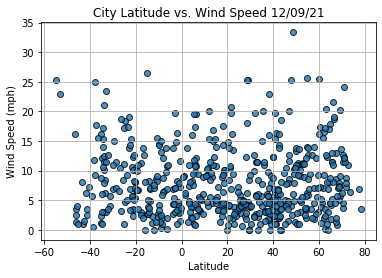

In [21]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

# Finding Correlation

In [22]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hofn,IS,2021-12-09 16:00:47,64.2539,-15.2082,39.22,65,90,8.05
1,Raudeberg,NO,2021-12-09 16:00:48,61.9875,5.1352,39.87,60,96,7.00
2,Upernavik,GL,2021-12-09 15:59:09,72.7868,-56.1549,8.26,96,93,10.89
3,Tuktoyaktuk,CA,2021-12-09 15:59:02,69.4541,-133.0374,-5.80,84,1,5.75
4,Udachnyy,RU,2021-12-09 16:00:48,66.4167,112.4000,-7.20,89,100,18.77


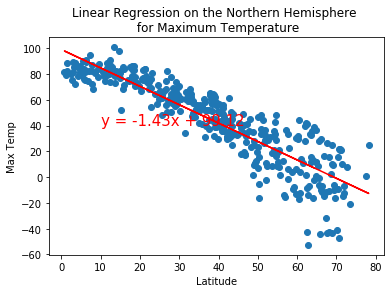

In [24]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

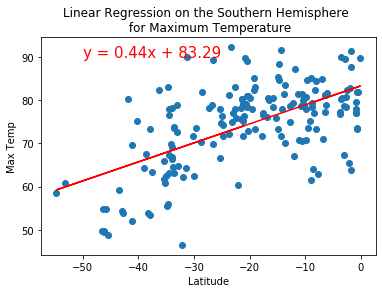

In [25]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

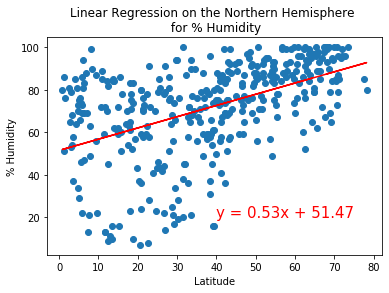

In [26]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

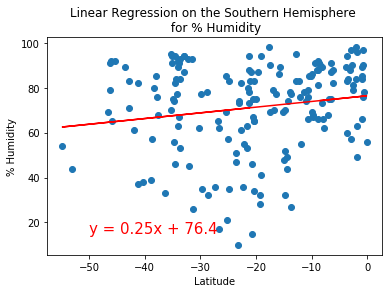

In [27]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

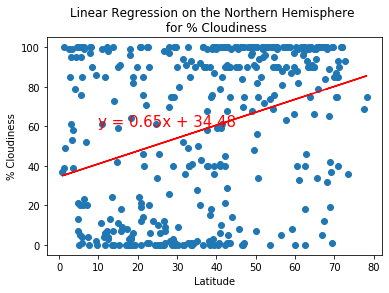

In [29]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

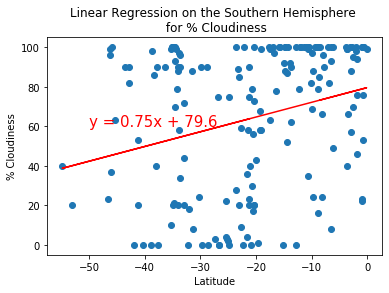

In [30]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

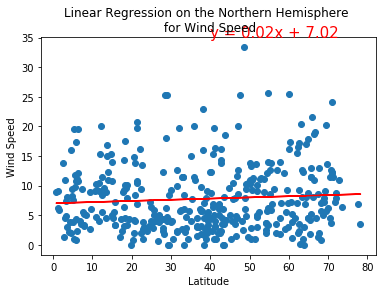

In [31]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

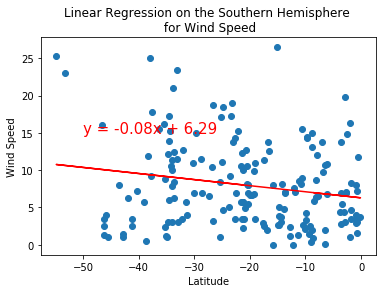

In [32]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))
